predicted accuracy -  0.9980687439963793
Mean Absolute Error: 767.9799372480995
Mean Squared Error: 35565200.13532048
Root Mean Squared Error: 5963.656607763434
Best score: 35643.33404465698
Best depth: 8


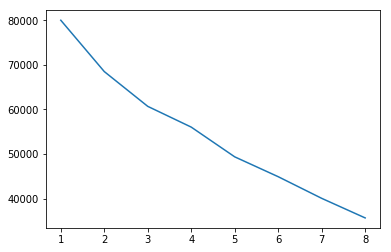

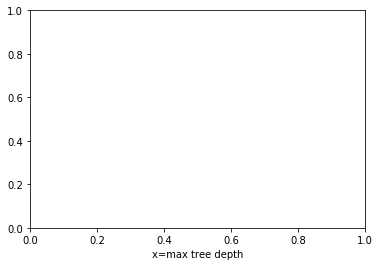

In [2]:
# Analysis of Real Estate Sales from 2001 to 2016
#
# Notebook focus: Finding factors driving differences in Actual Sales' Values vs. Assessed Sales' Value; 
# Using Random Forest and a Decision Tree from the SKLearn Library to derive numerical results. 
#
# Author: Jane Nikolova
# Occupation: Senior Consultant
# All Rights Reserved. 
# Date: May, 2019
#
# Data Source - Real Estate Sales 2001-2016
# https://catalog.data.gov/dataset/real-estate-sales-2001-2016

# Libraries - SKLearn, Pandas, NumPy, Matplotlib 

import pandas
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib.pyplot import *
from sklearn import tree
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  

# LOAD AND PRE-PROCESS THE DATA - 

# Use data loading class - 'DataFactory' - to load, transform the data on a basic level, 
# and engineer some new features out of 'sale date', 'list date' and remarks - 

import DataFactory
dataFile = 'Real_Estate_Sales_2001-2016.csv'
XY = DataFactory.allDataForOutcome(dataFile, 'SalesRatio')
X = XY[0] # All independent variables (predictors)
Y = XY[1] # Sales-Ratio - Variable of interest (predicted variable)

#print(X.shape)
#print(Y.shape)

# ML PREDICTION MODELS - 
# All models and menthods are from SKLearn -  

# DECISION TREE - Regressor - 
# The problem assesses the impact for a continuous variable. In the case of 
# categorical outcome, we would use the Classifier version of the Decision Tree. 

#Create train & validation sets - 30% validation, 70% train sets -
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)  

from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train) 

#Predict - 
y_pred = regressor.predict(X_test) 

#Accuracy for predicted vs. actual - 
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("predicted accuracy - ", score)
#predicted accuracy -  0.9979612350160512 

#Evaluate the performance of the algorithm -  MAE, MSE, RMSE - 
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

# Mean Absolute Error: 771.5091917079061
# Mean Squared Error: 38371152.832423516
# Root Mean Squared Error: 6194.44532080343

# Using cross-validation find the optimal tree depth - 
from sklearn.model_selection import cross_val_score
all_scores = []
best_score = -1
best_depth = 0
# Check for trees with depth from 1 to 10
for i in range(1,9):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    all_scores.append(current_score)
    
print("Best score:", best_score)# 35643.33404465698
print("Best depth:", best_depth)# 8! 
plt.plot(range(1, 9), all_scores)

plt.figure()
plt.xlabel('x=max tree depth')
plt.show()
#Create a tree with the best depth and plot the most important features - 
    
#Visualize the tree, plot the features importance, other model characteristics - 

# ENSEMBLE METHODS - 

# Bagging methods' group - minimizing bias (variance - bias trade-off) -
# AdaBoost - 
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# Random Forest -
from sklearn.ensemble import RandomForestRegressor

# Boosting methods' group - minimizing bias (variance - bias trade-off) - 
# Gradient Booster - 
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

# Neural Networks - relevance?

# ANY OTHER - MLR (Multiple Linear Regression + Stepwise), k-NN (k-Nearest Neighbor)
from sklearn.neighbors.nearest_centroid import NearestCentroid

# MODEL SELECTION - 

# UNSUPERVISED LEARNING -
# Find clusters - k-Means, and exploring the methods provided in SKLearn

